# HBAT.sav

In [ ]:
!pip install pyreadstat

In [ ]:
import numpy as np
import scipy as sp
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

## Data Preprocess

In [ ]:
df = pd.read_spss("HBAT.sav")

In [ ]:
transform_dict = {"x1":"customer_type", "x2":"industry_type", "x3":"firm_size", 
                  "x4":"region", "x5":"distribution_system", "x6":"product_quality",
                  "x7":"web_site", "x8":"technical_support", "x9":"complaint_resolution",
                  "x10":"advertising","x11":"product_line", "x12":"salesforce_image",
                  "x13":"competitive_pricing", "x14":"warranty&claims", "x15":"new_product",
                  "x16":"ordering&billing", "x17":"price_flexibility", "x18":"delivery_speed",
                  "x19":"satisfaction", "x20":"likelihood_of_recommendation",
                  "x21":"likelihood_of_future_purchase", "x22":"current_purchase",
                  "x23":"partnership_in_future"} 
df.rename(columns = transform_dict, inplace = True)
df.set_index('id', inplace = True)
df.head()

,customer_type,industry_type,firm_size,region,distribution_system,product_quality,web_site,technical_support,complaint_resolution,advertising,product_line,salesforce_image,competitive_pricing,warranty&claims,new_product,ordering&billing,price_flexibility,delivery_speed,satisfaction,likelihood_of_recommendation,likelihood_of_future_purchase,current_purchase,partnership_in_future
id,,,,,,,,,,,,,,,,,,,,,,,
1.0,1 to 5 years,Magazine industry,Large (500+),Outside North America,Direct to customer,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,4.3,5.0,5.1,3.7,8.2,8.0,8.4,65.1,"Yes, would consider"
2.0,Over 5 years,Newsprint industry,Small (0 to 499),USA/North America,Indirect through broker,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,4.0,3.9,4.3,4.9,5.7,6.5,7.5,67.1,"No, would not consider"
3.0,Over 5 years,Magazine industry,Large (500+),Outside North America,Direct to customer,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,4.6,5.4,4.0,4.5,8.9,8.4,9.0,72.1,"Yes, would consider"
4.0,Less than 1 year,Newsprint industry,Large (500+),Outside North America,Indirect through broker,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,3.6,4.3,4.1,3.0,4.8,6.0,7.2,40.1,"No, would not consider"
5.0,1 to 5 years,Magazine industry,Large (500+),USA/North America,Direct to customer,9,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,4.5,3.5,3.5,7.1,6.6,9.0,57.1,"No, would not consider"


In [ ]:
df.drop(columns=['customer_type', 'industry_type', 'firm_size', 'region', 'distribution_system', "partnership_in_future"]).columns

Index(['product_quality', 'web_site', 'technical_support',
       'complaint_resolution', 'advertising', 'product_line',
       'salesforce_image', 'competitive_pricing', 'warranty&claims',
       'new_product', 'ordering&billing', 'price_flexibility',
       'delivery_speed', 'satisfaction', 'likelihood_of_recommendation',
       'likelihood_of_future_purchase', 'current_purchase'],
      dtype='object')

In [ ]:
df["product_quality"] = df["product_quality"].replace({"Excellent":10}).astype("float")

In [ ]:
for i in df.drop(columns=['customer_type', 'industry_type', 'firm_size', 'region', 'distribution_system', "partnership_in_future"]).columns:
  df[i] = df[i].astype("float")

## Data Profiling

In [ ]:
df_corr = df[['product_quality', 'web_site', 'technical_support',
       'complaint_resolution', 'advertising', 'product_line',
       'salesforce_image', 'competitive_pricing', 'warranty&claims',
       'new_product', 'ordering&billing', 'price_flexibility',
       'delivery_speed', 'satisfaction', 'likelihood_of_recommendation',
       'likelihood_of_future_purchase', 'current_purchase']].corr().stack().reset_index().rename(columns={0: 'correlation', 'level_0': 'variable', 'level_1': 'variable2'})
df_corr['correlation_label'] = df_corr['correlation'].map('{:.2f}'.format)

base = alt.Chart(df_corr).encode(
    x='variable2:O',
    y='variable:O'    
)

# Text layer with correlation labels
# Colors are for easier readability
text = base.mark_text().encode(
    text='correlation_label',
    color=alt.condition(
        alt.datum.correlation > 0.5, 
        alt.value('white'),
        alt.value('black')
    )
)

# The correlation heatmap itself
cor_plot = base.mark_rect().encode(
    color='correlation:Q'
).properties(
    width = 700,
    height = 700
)

cor_plot + text

alt.LayerChart(...)

In [ ]:
alt.Chart(df[['product_quality', 'web_site', 'technical_support',
       'complaint_resolution', 'advertising', 'product_line',
       'salesforce_image', 'competitive_pricing', 'warranty&claims',
       'new_product', 'ordering&billing', 'price_flexibility',
       'delivery_speed', 'satisfaction', 'likelihood_of_recommendation',
       'likelihood_of_future_purchase', 'current_purchase']]
          ).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Origin:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['product_quality', 'web_site', 'technical_support',
       'complaint_resolution', 'advertising', 'product_line',
       'salesforce_image', 'competitive_pricing', 'warranty&claims',
       'new_product', 'ordering&billing', 'price_flexibility',
       'delivery_speed', 'satisfaction', 'likelihood_of_recommendation',
       'likelihood_of_future_purchase', 'current_purchase'],
    column=['product_quality', 'web_site', 'technical_support',
       'complaint_resolution', 'advertising', 'product_line',
       'salesforce_image', 'competitive_pricing', 'warranty&claims',
       'new_product', 'ordering&billing', 'price_flexibility',
       'delivery_speed', 'satisfaction', 'likelihood_of_recommendation',
       'likelihood_of_future_purchase', 'current_purchase']
)

alt.RepeatChart(...)

In [ ]:
base = alt.Chart(df).encode(
    x='product_quality:Q',
    y='satisfaction:Q',
)

points = base.mark_point()

density_x = base.transform_density(
    density='product_quality',
    as_=['Product_quality', 'density'],
    extent = [0,10]
).mark_line(orient='vertical').encode(
    x="Product_quality:Q",
    y='density:Q'
).properties(
    height=100
)

density_y = base.transform_density(
    density='satisfaction',
    as_=['Satisfaction', 'density'],
    extent = [0, 10]
).mark_line(orient='horizontal').encode(
    x='density:Q',
    y="Satisfaction:Q"
).properties(
    width=100
)

density_x & (points | density_y)

alt.VConcatChart(...)

In [ ]:
alt.Chart(df).mark_boxplot().encode(
    alt.X('customer_type:N'),
    alt.Y('product_quality:Q')
).properties(
    width = 500,
    height = 300
)

alt.Chart(...)

In [ ]:
import altair as alt

alt.Chart(df).transform_window(
    index='count()'
).transform_fold(
    ['satisfaction', 'product_quality', "technical_support"]
).mark_line().encode(
    x='key:N',
    y='value:Q',
    color='region:N',
    detail='index:N',
    opacity=alt.value(0.5)
).properties(width=500)

alt.Chart(...)

### Outlier Detection

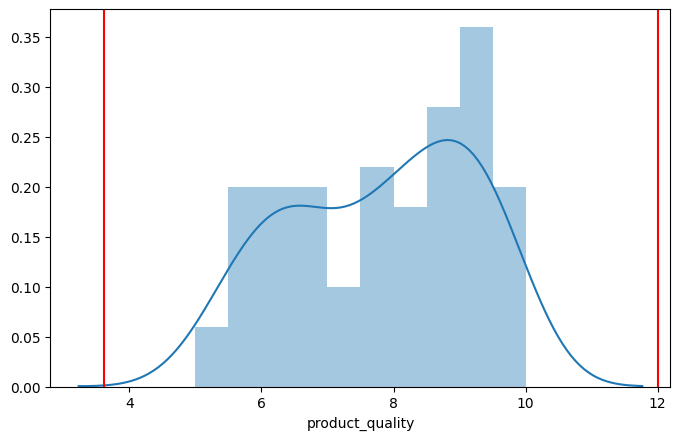

In [ ]:
column = "product_quality"
fig = plt.figure(figsize=(8,5), dpi = 100)
ax = sns.distplot(df[column], bins = 10, kde = True)
plt.axvline(x=df[column].mean()-3 * df[column].std(), color='r', linestyle='-')
plt.axvline(x=df[column].mean()+3 * df[column].std(), color='r', linestyle='-')

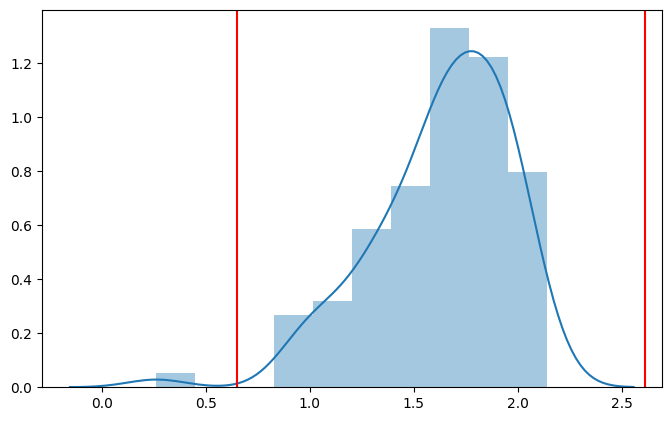

In [ ]:
arr_df = df['technical_support'].to_numpy()
log_df = np.log(arr_df)
fig = plt.figure(figsize=(8,5), dpi = 100)
ax = sns.distplot(log_df, bins = 10, kde = True)
plt.axvline(x=np.mean(log_df)-3 * np.std(log_df), color='r', linestyle='-')
plt.axvline(x=np.mean(log_df)+3 * np.std(log_df), color='r', linestyle='-')

Text(0, 0.5, 'satisfaction')

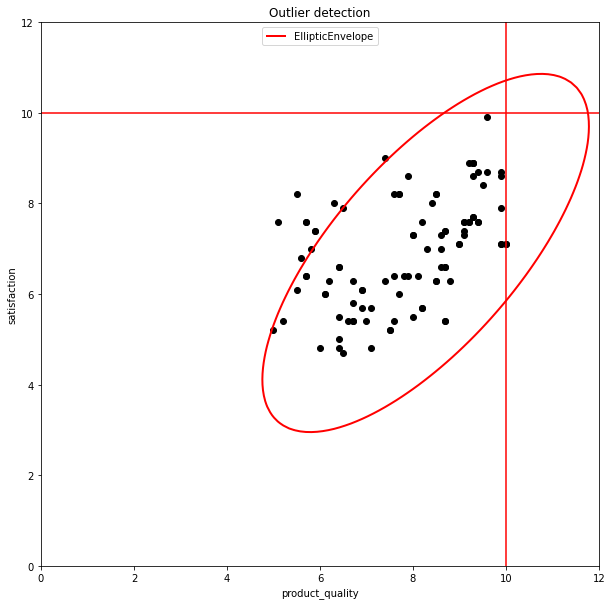

In [ ]:
from sklearn.covariance import EllipticEnvelope
clf = EllipticEnvelope()

legend = {}
xx, yy = np.meshgrid(np.linspace(0, 12, 100), np.linspace(0, 12, 100))
plt.figure(1, figsize=(10,10))
clf.fit(df[['product_quality','satisfaction']].values)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
legend['EllipticEnvelope'] = plt.contour(
    xx, yy, Z, levels=[0], linewidths=2, colors=['r'])

legend_values_list = list(legend.values())
legend_keys_list = list(legend.keys())

plt.figure(1, figsize=(10,10))# two clusters
plt.title("Bivariate Outlier detection")
plt.scatter(df['product_quality'].values, df['satisfaction'].values, color='black')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")

plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))
plt.legend(legend_values_list[0].collections, legend_keys_list,
           loc="upper center");
plt.axhline(y=10, color='r', linestyle='-');
plt.axvline(x=10, color='r', linestyle='-')
plt.xlabel("product_quality"); 
plt.ylabel("satisfaction")

In [ ]:
from scipy.spatial.distance import mahalanobis
import scipy as sp
import pandas as pd

def mahalanobisR(X,meanCol,IC):
    m = []
    for i in range(X.shape[0]):
      m.append(mahalanobis(X.iloc[i,:],meanCol,IC) ** 2)
    return(m)

x = df[["product_quality", "satisfaction"]]
Sx = x.cov().values
Sx = sp.linalg.inv(Sx)
mean = x.mean().values

mR = mahalanobisR(x,mean,Sx)

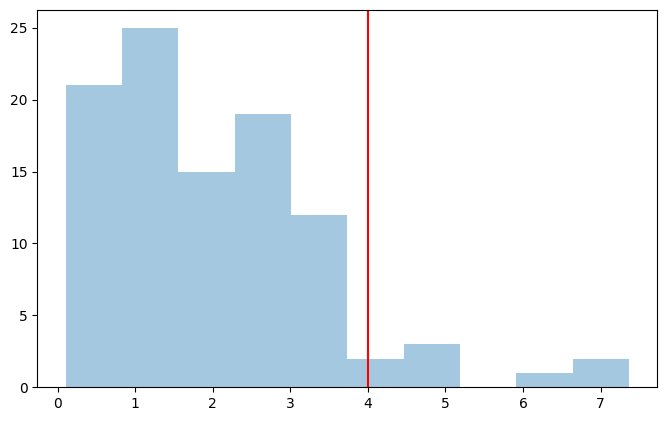

In [ ]:
fig = plt.figure(figsize=(8,5), dpi = 100)
ax = sns.distplot(mR, bins = 10, kde = False)
plt.axvline(x=4, color='r', linestyle='-')

In [ ]:
import altair as alt
import pandas as pd
import numpy as np

# Generating stem-leaf dataframe
source = pd.DataFrame({'samples': df.satisfaction.astype(float).astype(str)})

# Splitting stem and leaf
source['stem'] = source['samples'].str[:-1]
source['leaf'] = source['samples'].str[-1]

source = source.sort_values(by=['stem', 'leaf'])

# Determining leaf position
source['position'] = source.groupby('stem').cumcount().add(1)

# Creating stem and leaf plot
alt.Chart(source).mark_text(
    align='left',
    baseline='middle',
    dx=-5
).encode(
    alt.X('position:Q', title='',
        axis=alt.Axis(ticks=False, labels=False, grid=False)
    ),
    alt.Y('stem:N', title='', axis=alt.Axis(tickSize=0)),
    text='leaf:N',
).configure_axis(
    labelFontSize=20
).configure_text(
    fontSize=20
)

alt.Chart(...)

### Normality Test

In [ ]:
from scipy.stats import kurtosistest
kurtosistest(df.satisfaction)

KurtosistestResult(statistic=-2.479922184687465, pvalue=0.013141105779122239)

In [ ]:
from scipy.stats import skewtest
skewtest(df.satisfaction)

SkewtestResult(statistic=0.33420807842092776, pvalue=0.7382225484444592)

In [ ]:
from scipy import stats
stats.kstest(df.satisfaction, "norm")

KstestResult(statistic=0.9999986991925461, pvalue=0.0)

In [ ]:
stats.shapiro(df.satisfaction)

(0.9751627445220947, 0.055562574416399)

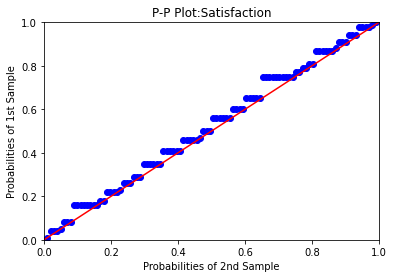

In [ ]:
import statsmodels.api as sm
import numpy as np
pp_x = sm.ProbPlot(df['satisfaction'], fit=True)
fig = pp_x.ppplot(line='45', other=pp_x)
h = plt.title('P-P Plot:Satisfaction')
plt.show()

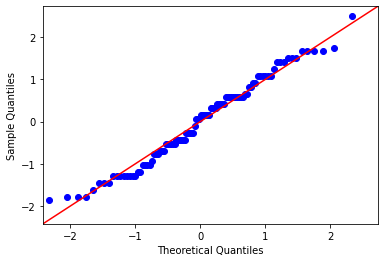

In [ ]:
import numpy as np
import statsmodels.api as sm
import pylab

arr_df = df['satisfaction'].to_numpy()
arr_df = (arr_df - np.mean(arr_df)) / np.std(arr_df)

sm.qqplot(arr_df, line='45')
pylab.show()

# HBAT_MISSING.sav

In [ ]:
!pip install pyreadstat

     |████████████████████████████████| 2.0MB 3.5MB/s 


In [ ]:
import numpy as np
import scipy as sp
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_spss("HBAT_MISSING.sav")

In [ ]:
df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,201.0,3.3,0.9,8.6,4.0,2.1,1.8,6.3,41.0,4.5,0.0,1.0,0.0,0.0,2.0
1,202.0,NaN,0.4,NaN,2.5,1.2,1.7,5.2,35.0,3.3,0.0,1.0,0.0,0.0,1.0
2,203.0,3.0,NaN,9.1,7.1,3.5,3.4,NaN,55.0,5.2,0.0,1.0,1.0,0.0,3.0
3,204.0,NaN,1.5,NaN,4.8,1.9,2.5,7.2,36.0,NaN,1.0,0.0,1.0,0.0,1.0
4,205.0,5.1,1.4,NaN,4.8,3.3,2.6,3.8,49.0,4.9,0.0,1.0,0.0,0.0,2.0


## Missing Data Handling

In [ ]:
na_jar = []
for i in df.index:
  if df.loc[i].isnull().sum() > 0:
    na_jar.append(i)
df.loc[na_jar]

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
1,202.0,NaN,0.4,NaN,2.5,1.2,1.7,5.2,35.0,3.3,0.0,1.0,0.0,0.0,1.0
2,203.0,3.0,NaN,9.1,7.1,3.5,3.4,NaN,55.0,5.2,0.0,1.0,1.0,0.0,3.0
3,204.0,NaN,1.5,NaN,4.8,1.9,2.5,7.2,36.0,NaN,1.0,0.0,1.0,0.0,1.0
4,205.0,5.1,1.4,NaN,4.8,3.3,2.6,3.8,49.0,4.9,0.0,1.0,0.0,0.0,2.0
6,207.0,NaN,1.5,NaN,4.8,1.9,2.5,7.2,36.0,NaN,1.0,0.0,1.0,0.0,1.0
9,210.0,4.1,3.7,5.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,2.0
12,213.0,3.1,NaN,NaN,7.8,3.6,4.0,5.9,43.0,5.2,0.0,1.0,1.0,1.0,2.0
13,214.0,NaN,2.7,5.0,NaN,2.2,NaN,NaN,NaN,3.6,1.0,NaN,1.0,NaN,1.0
15,216.0,NaN,1.6,6.4,5.0,NaN,2.1,8.4,25.0,3.4,1.0,0.0,1.0,1.0,1.0
17,218.0,NaN,2.8,5.2,5.0,NaN,2.7,8.4,38.0,3.7,1.0,0.0,1.0,0.0,1.0


In [ ]:
df.isnull().sum(axis = 0)

ID      0
V1     21
V2     13
V3     17
V4      7
V5      9
V6      6
V7      9
V8      9
V9      7
V10     2
V11     2
V12     2
V13     1
V14     2
dtype: int64

In [ ]:
df.isnull().sum(axis = 1)

0     0
1     2
2     2
3     3
4     1
     ..
65    0
66    2
67    1
68    2
69    0
Length: 70, dtype: int64

## Interpolation

In [ ]:
df.fillna({"V2":df["V2"].mean()})

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,201.0,3.3,0.90000,8.6,4.0,2.1,1.8,6.3,41.0,4.5,0.0,1.0,0.0,0.0,2.0
1,202.0,NaN,0.40000,NaN,2.5,1.2,1.7,5.2,35.0,3.3,0.0,1.0,0.0,0.0,1.0
2,203.0,3.0,1.94386,9.1,7.1,3.5,3.4,NaN,55.0,5.2,0.0,1.0,1.0,0.0,3.0
3,204.0,NaN,1.50000,NaN,4.8,1.9,2.5,7.2,36.0,NaN,1.0,0.0,1.0,0.0,1.0
4,205.0,5.1,1.40000,NaN,4.8,3.3,2.6,3.8,49.0,4.9,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,266.0,4.2,2.40000,9.4,4.9,3.2,2.7,8.5,49.0,5.2,0.0,1.0,0.0,1.0,2.0
66,267.0,3.8,0.80000,NaN,NaN,2.2,2.6,5.3,42.0,5.1,0.0,1.0,0.0,0.0,2.0
67,268.0,3.3,2.60000,9.7,3.3,2.9,1.5,5.2,47.0,NaN,0.0,1.0,0.0,1.0,3.0
68,269.0,NaN,1.90000,NaN,4.5,1.5,3.1,9.9,39.0,3.3,1.0,0.0,1.0,1.0,1.0


In [ ]:
df_corr = df.corr()
df_corr

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
ID,1.000000,-0.070093,0.198101,0.112399,-0.081530,0.079525,-0.090982,0.215808,0.148316,-0.132571,0.183455,-0.139971,0.039952,0.142621,0.131315
V1,-0.070093,1.000000,-0.446327,0.370633,-0.099358,0.317103,0.031035,-0.119639,0.377169,0.513980,-0.301466,0.273990,-0.593813,-0.026061,0.332743
V2,0.198101,-0.446327,1.000000,-0.418117,0.298244,0.421205,0.259463,0.347679,0.149182,-0.200667,0.275901,-0.296103,0.519118,0.106104,-0.041577
V3,0.112399,0.370633,-0.418117,1.000000,-0.065412,0.098197,-0.035088,-0.358116,0.601371,0.706988,-0.597790,0.598097,-0.683701,-0.006572,0.679572
V4,-0.081530,-0.099358,0.298244,-0.065412,1.000000,0.443559,0.799029,0.405734,0.226182,0.382057,-0.037637,0.057002,0.230230,-0.069806,0.125177
V5,0.079525,0.317103,0.421205,0.098197,0.443559,1.000000,0.344008,0.066377,0.711563,0.543101,-0.231804,0.283371,-0.083810,0.053421,0.546880
V6,-0.090982,0.031035,0.259463,-0.035088,0.799029,0.344008,1.000000,0.401908,0.267762,0.204650,-0.094318,0.094318,0.127850,0.125130,0.051122
V7,0.215808,-0.119639,0.347679,-0.358116,0.405734,0.066377,0.401908,1.000000,-0.190953,-0.255659,0.503307,-0.503307,0.489189,0.078454,-0.366868
V8,0.148316,0.377169,0.149182,0.601371,0.226182,0.711563,0.267762,-0.190953,1.000000,0.669081,-0.393001,0.393001,-0.329922,-0.049345,0.821757
V9,-0.132571,0.513980,-0.200667,0.706988,0.382057,0.543101,0.204650,-0.255659,0.669081,1.000000,-0.552549,0.537322,-0.538890,-0.161563,0.717056


In [ ]:
df_rg = df[['V1','V4']]
df_rg.dropna(inplace = True)
x = df_rg[['V1']]
y = df_rg["V4"]

from sklearn import linear_model
lr_sklearn = linear_model.LinearRegression(fit_intercept = True, normalize = False)
lr_fitted_sklearn = lr_sklearn.fit(x.values, y.values)

y_embed = df["V4"].isnull()
x_tobe_pred = pd.DataFrame(df["V1"][y_embed])
x_tobe_pred.dropna(inplace=True)

y_pred = lr_fitted_sklearn.predict(x_tobe_pred)

x_tobe_pred["y_pred"] = 0
for i in x_tobe_pred.index:
  j = 0
  x_tobe_pred.loc[i, "y_pred"] = y_pred[j]
  j += 1

for i in x_tobe_pred.index:
  df.loc[i,"V4"] = x_tobe_pred.loc[i,"y_pred"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Missing Data Visualization with Missingno

In [ ]:
!pip install missingno

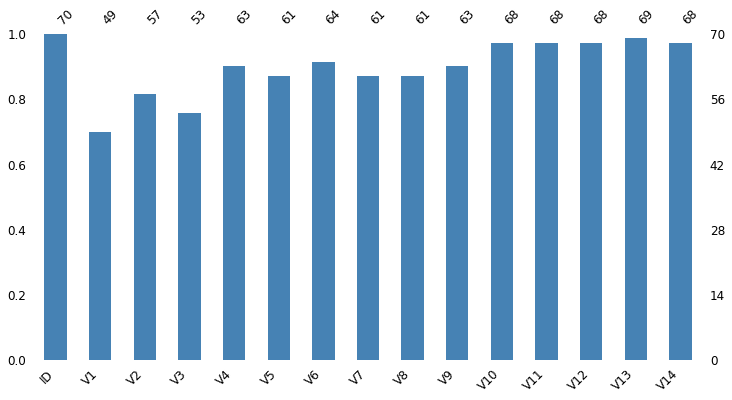

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(df, figsize=(12, 6), fontsize=12, color='steelblue')

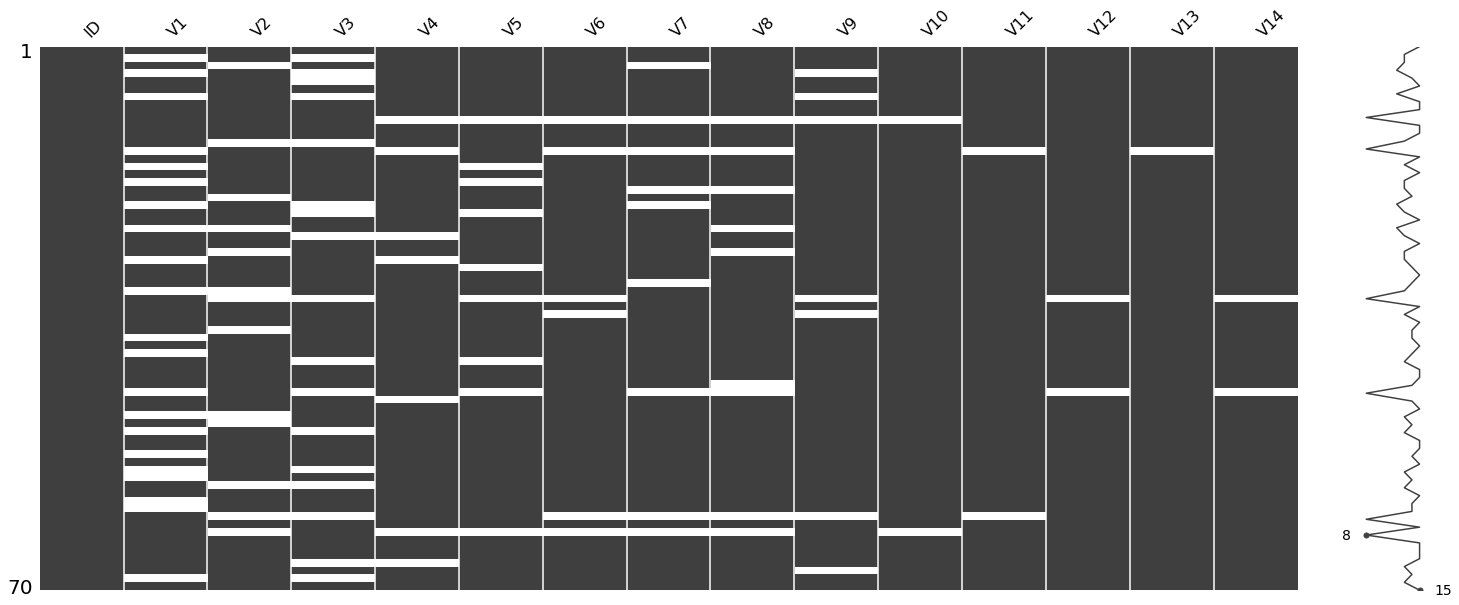

In [ ]:
import missingno as msno
msno.matrix(df)

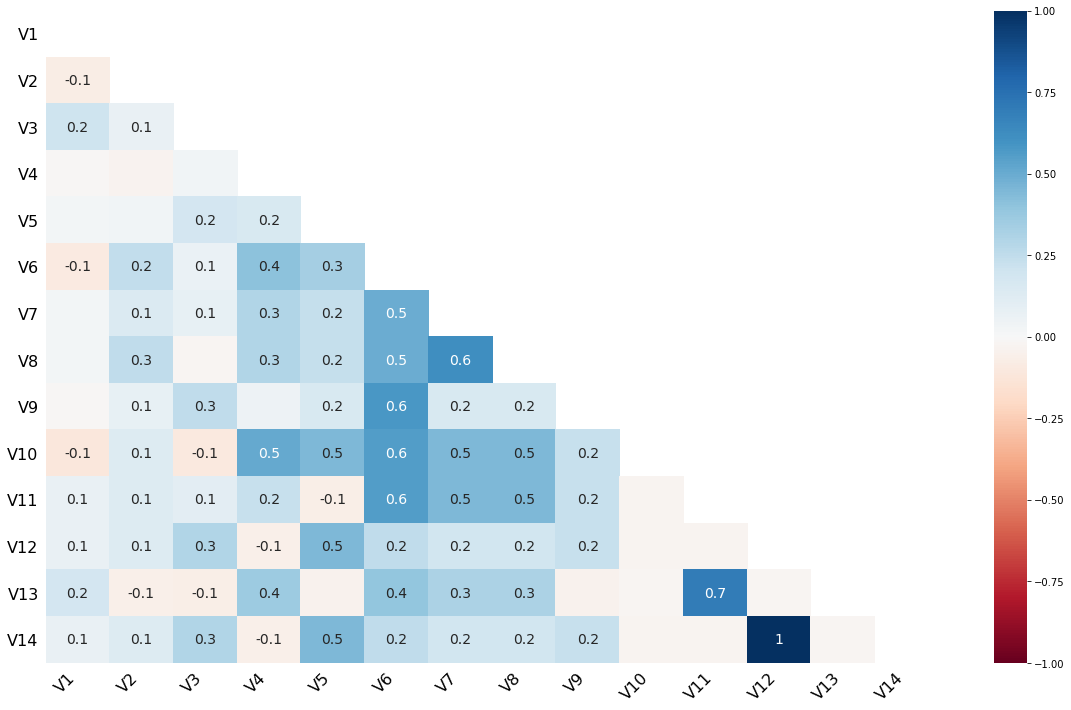

In [ ]:
msno.heatmap(df)

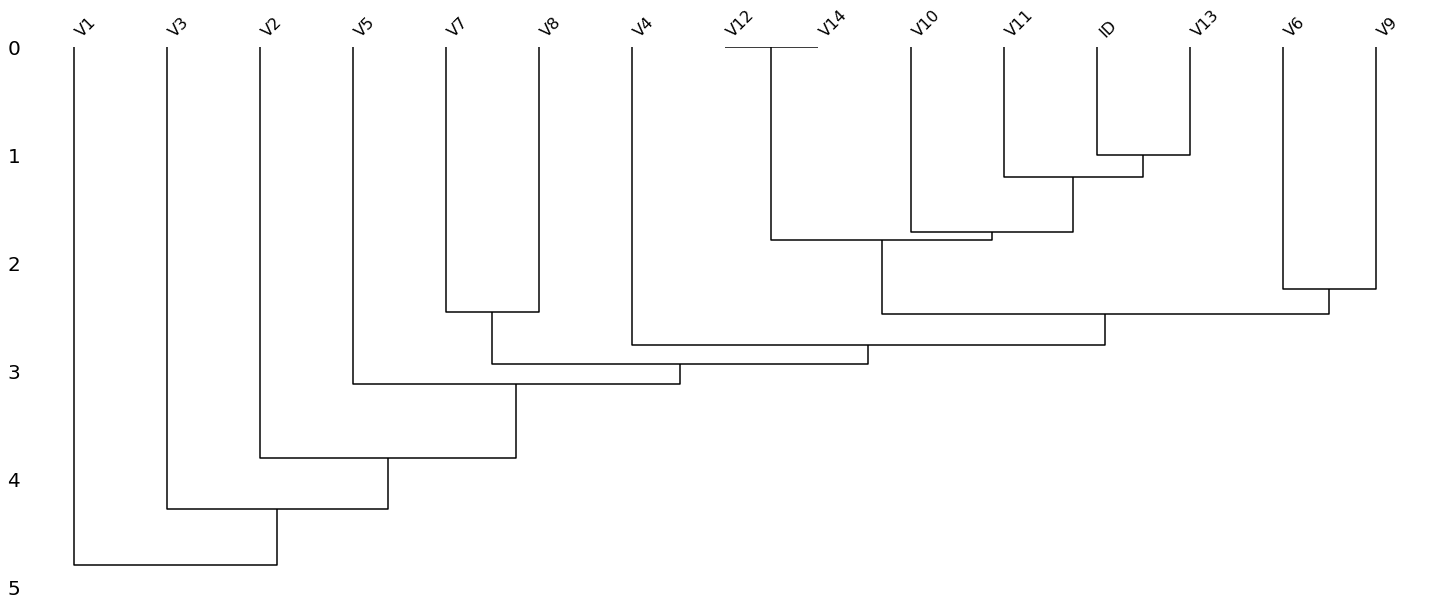

In [ ]:
msno.dendrogram(df)